## Proyek Analisis Data: E-commerce-public-dataset

* Nama: Andi Zulfikar
* Email: andizulfikar831@gmail.com
* Id Dicoding: andi_zulfikar

### Menentukan Pertanyaan Bisnis:

1. Bagaimana performa dan revenue penjualan dalam beberapa bulan terakhir?
2. Produk apa yang memiliki review score tertinggi?
3. Produk apa yang paling banyak terjual?
4. Bagaimana demografi pelanggan berdasarkan negara yang kita miliki?
5. Seller dengan review score reviews tertinggi?
6. Kapan terakhir pelanggan melakukan transaksi?
7. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
8. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

### Menyiapkan semua library yang dibutuhkan  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wragling

>Data wragling merupakan sebuah proses kegiatan yang meliputi gathering, asessing, dan cleaning data.

#### Gathering Data

> Gathering data merupakan tahapan pengumpulan data.

##### 1. Memuat tabel customers

In [2]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


>Mengumpulkan data customers dari file csv

##### 2. Memuat tabel orders

In [3]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


>Mengumpulkan data orders dari file csv

##### 3. Memuat tabel order-items

In [4]:
order_item_df = pd.read_csv("./data/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


>Mengumpulkan data orders-item dari file csv

##### 4. Memuat tabel order-reviews

In [5]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


>Mengumpulkan data order-reviews dari file csv

##### 5. Memuat tabel products

In [6]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


>Mengumpulkan data products dari file csv

##### 6. Memuat tabel product-category-translation

In [7]:
product_category_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


>Mengumpulkan data product-category-translation dari file csv

##### 7. Memuat tabel sellers

In [8]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


>Mengumpulkan data sellers dari file csv

#### Asessing Data

>Asessing data Merupakan tahapan penilaian terhadap data yang telah dikumpulkan dengan tujuan mengidentifikasi masalah yang terdapat dalam data.

##### 1. Menilai tabel customers

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


>tidak terdapat masalah dalam tipe data dan missing value.

In [10]:
print("duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


>Tidak terdapat keanehan dan tidak terdapat duplikasi data. 

##### 2. Menilai tabel orders

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


>terdapat masalah dalam tipe data waktu dalam orderan dan missing value.

In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

>missing value terdapat pada kolom approved, delivered_carrier dan delivered_customer

In [13]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


>Tidak terdapat keanehan dalam data tersebut

##### 3. Menilai tabel order-items

In [14]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


>tidak terdapat missing value namun terdapat invalid tipe data.

In [15]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())
order_item_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


>tidak terdapat duplikasi dan keanehan dalam data.

##### 4. Menilai tabel order_riviews

In [16]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


>Terdapat masalah dalam tipe data (datetime) dan missing value

In [17]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

>Missing value terdapat dalam kolom title dan message

In [18]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


>tidak terdapat duplikasi dan keanehan dalam data

##### 5. Menilai tabel product_category_name

In [19]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


>tidak terdapat missing value dan tipe data yang salah

In [20]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


>tidak terdapat duplikasi dan keanehan dalam data

##### 6. Menilai tabel products

In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


>terdapat missing value namun tidak ada kesalahan dalam tipe data

In [22]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

>missing value terdapat dikesuluruhan keterangan product

In [23]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


>tidak terdapat duplikasi dan keanehan dalam data

##### 7. Menilai tabel sellers 

In [24]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


>Tidak terdapat missing value dan invalid tipe data

In [25]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


>Tidak terdapat duplikasi dan keanehan dalam data

##### Hasil Identifikasi Masalah dari data yang telah dikumpulkan

>*No*|*Dataset*|*Tipe Data*|*Missing Value*|*Duplicated Data*|*Inacurate Value*
>---|---|---|---|---|---
>*1*|customers_df|-|-|-|-
>*2*|orders_df|Terdapat kesalahan dalam tipe data untuk kolom purchase, approved, delivered_carrier, delivered_customer, dan estimated_delivery|Terdapat 160 missing value pada kolom approved, 1783 delivered_carrier dan 2965 delivered_customer|-|-
>*3*|order_items_df|Terdapat kesalahan tipe data untuk kolom shipping_limit_date|-|-|-
>*4*|order_reviews_df|Terdapat masalah dalam tipe data untuk kolom creation_date dan answer_timestamp|Terdapat 87656 missing value pada kolom comment_title dan 58247 pada kolom message|-|-
>*5*|product_category_df|-|-|-|-
>*6*|products_df|-|Terdapat 610 missing value untuk kolom category, name_length, description_length, photos_qty, dan 2 untuk kolom weight, length, height dan width|-|-
>*7*|sellers_df|-|-|-|-

#### Cleaning Data

##### 1. Membersihkan tabel orders_df

In [26]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


>Mengubah tipe data object menjadi datetime untuk kolom yang bermasalah

In [27]:
orders_df.order_approved_at.interpolate(method="linear", limit_direction="forward", inplace=True)
orders_df.order_delivered_carrier_date.interpolate(method="linear", limit_direction="forward", inplace=True)
orders_df.order_delivered_customer_date.interpolate(method="linear", limit_direction="forward", inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

>Mengatasi missing value menggunakan metode interpolate karena metode ini sangat cocok digunakan pada data time series

##### 2. Membersihkan tabel order_item_df

In [28]:
for column in ["shipping_limit_date"]:
    order_item_df[column] = pd.to_datetime(order_item_df[column])

order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


>Mengubah tipe data object pada kolom shipping_limit_date menjadi tipe data datetime

##### 3. Membersihkan tabel order_reviews_df

In [29]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


>Mengubah tipe data object menjadi datetime pada kolom creation_date dan answer_timestamp

In [30]:
order_reviews_df.review_comment_title.fillna(value="No Title", inplace=True)
order_reviews_df.review_comment_message.fillna(value="No Message", inplace=True)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

>Mengatasi missing value menggunakan metode Imputation dengan mengisi kolom kosong menjadi No title dan No message karena kolom tersebut tidak bisa diisi berdasarkan nilai yang paling sering muncul melainkan berdasarkan reviews score mereka, serta yang dibutuhkan hanya reviews_scorenya aja sebagai parameter untuk memberikan solusi dari pertanyaan bisnis yang ada 

##### 4. Membersihkan tabel products_df

In [31]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

>berdasarkan hasil di atas, category name yang paling dominan adalah cama_mesa_banho.   

In [32]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)
products_df.product_name_lenght.fillna(value=products_df.product_name_lenght.mean(), inplace=True)
products_df.product_description_lenght.fillna(value=products_df.product_description_lenght.mean(), inplace=True)
products_df.product_photos_qty.fillna(value=products_df.product_photos_qty.mean(), inplace=True)
products_df.product_weight_g.fillna(value=products_df.product_weight_g.mean(), inplace=True)
products_df.product_length_cm.fillna(value=products_df.product_length_cm.mean(), inplace=True)
products_df.product_height_cm.fillna(value=products_df.product_height_cm.mean(), inplace=True)
products_df.product_width_cm.fillna(value=products_df.product_width_cm.mean(), inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

>Mengatasi missing value menggunakan imputation dimana kolom kategorik diisi dengan nilai yang paling dominan dan kolom numerik diisi berdasarkan nilai rata rata dari kolom tersebut

### Exploratory Data Analysis (EDA)

##### 1. Explore data customers_df

In [33]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


>Dari hasil diatas kita dapat mengeksplor persebaran customer berdasarkan city dan state

In [34]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

>Data dari pivot table diatas kita dapat mengetahui bahwa sao paulo merupakan kota paling banyak customer berasal  

In [35]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

>Data dari pivot table diatas kita dapat mengetahui bahwa SP merupakan negara paling banyak customer berasal  

##### 2. Explore data orders_df

In [36]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


>Dari hasil diatas kita dapat mengeksplor status order

In [37]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

>Hasil diatas dapat kita ketahui terdapat 96478 telah dikirimkan dan 625 dibatalkan

##### 3. Explore data orders_df dan customers_df

>Saya akan melakukan penggabungan data antara customers_df dan orders_df untuk memperolah lebih banyak informasi

In [38]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


>Berdasarkan data yang telah diagabungkan diatas, kita akan mengekplor beberapa hal berikut:

* jumlah order berdasarkan kota 

In [39]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


>Dari data diatas kita dapat mengetahui sao paulo dan rio de jeneiro merupakan 2 kota yang memiliki jumlah orderan terbanyak

* jumlah orderan berdasarkan negara

In [40]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


##### 4. Explore orders_item

>dari table orders_item kita dapat mengetahui product yang memiliki price tertingi dan terendah

In [41]:
order_item_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


##### 5. Explore orders_item_df dan customers_orders_df 

>Pada data orders_item_df terdapat order_item_id yang akan digunakan untuk mendapatkan informasi jumlah item yang dipesan dalam 1 orderan customers berserta total pricenya, oleh karena itu saya melakukan penggabungan untuk mendapatkan banyak informasi

In [42]:
orders_item_customer_df = pd.merge(
    left=order_item_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_item_customer_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
63108,901726cc51af45cdf902b4791c57d310,1,b1acb7e8152c90c9619897753a75c973,cc419e0650a3c5ba77189a1882b7556a,2017-04-17 11:50:14,34.99,14.52,5d39a27662556eb01f5601ea0c7398af,delivered,2017-04-07 11:32:15,2017-04-07 11:50:14,2017-04-12 13:32:57,2017-04-19 15:53:46,2017-05-05,8be313230de40c7e4c9af757061c8719,38412,uberlandia,MG
15258,22caa724849d26dec4cd73ffc70bc133,1,51945302d0858fe2efed398e1fa2df04,951e8cef368f09bb3f3d03c00ca4702c,2018-06-26 17:21:20,64.99,18.56,983286740ff2d1fd74d499fd1a711de7,delivered,2018-06-20 16:51:23,2018-06-20 17:21:20,2018-06-21 12:51:00,2018-06-28 13:48:32,2018-07-17,a2b6e488aad29c0bb3621a5a9c5a9d41,83010,sao jose dos pinhais,PR
31578,47a211c899f0043d4ce13337d863bf16,1,9a858b9c47bfc94a3b1548364f9324ac,e067ad2c1c0b48758eb1b5228bcf7a68,2018-01-05 15:26:48,34.90,15.10,ff552e86993d783ace2864dbdd5226c5,delivered,2017-12-30 15:14:18,2017-12-30 15:26:48,2018-01-05 18:28:30,2018-01-11 15:15:03,2018-01-30,9b994af54c6d32342fef79cf811d2e5a,39400,montes claros,MG
34402,4dcf81f76e3af4f8740d2b3c159a453d,1,ba74c6b75d2ad7503175809688d5a03c,b33e7c55446eabf8fe1a42d037ac7d6d,2018-04-19 17:21:54,178.98,13.69,91721b6690bba7032a15f885b4ebb190,delivered,2018-04-13 16:23:38,2018-04-13 17:21:54,2018-04-17 02:40:29,2018-04-20 11:11:52,2018-05-08,c3a5a6bb526f4595608414845b62f950,5735,sao paulo,SP
37224,5478595838b69d4f1d19e87ec399eee6,1,8d7b1f65c55c4c92979d7a0c36200c29,80e6699fe29150b372a0c8a1ebf7dcc8,2017-08-31 09:25:09,99.90,25.73,e294a68d25cb786637b9bc7e4b9b7102,delivered,2017-08-27 09:12:42,2017-08-27 09:25:09,2017-08-28 22:43:18,2017-09-08 15:54:48,2017-09-25,a395c6ffeb0283ee1661c8307db448dd,58075,joao pessoa,PB


>Dari data diatas setelah digabungkan maka akan menampilkan order_id lebih dari satu yang dibedakan oleh order_item_id yang menandakan jika jumlah item_id bertambah maka order_id juga ikut bertambah. Oleh karena itu saya membuat pivot tabel yang menunjukkan total_item dan total price 

In [43]:
orders_total_item_customer_df = orders_item_customer_df.groupby(by="customer_id").agg({
    "order_id": "count",
    "price": "sum"
})

orders_total_item_customer_df = orders_total_item_customer_df.reset_index().rename(columns={
    "order_id": "total_item",
    "price": "total_price"
}).sort_values(by="total_item", ascending=False)
orders_total_item_customer_df

,customer_id,total_item,total_price
97220,fc3d1daec319d62d49bfb5e1f83123e9,21,31.80
73568,be1b70680b9f9694d8c70f41fa3dc92b,20,2000.00
73311,bd5d39761aa56689a265d95d8d32b8be,20,1974.00
67106,adb32467ecc74b53576d9d13a5a55891,15,765.00
6456,10de381f8a8d23fff822753305f71cae,15,982.35
...,...,...,...
34607,5a1739996fb7a15067fa38c3a0a1097e,1,35.00
34605,5a15f2faee1402a7a587641c107b5e10,1,59.90
34604,5a158dfc1554dd2b4fe7f3c2581993bd,1,79.00
34603,5a1523d32a6d1b323a05895f5164655d,1,29.90


##### 6. Explore orders_item_customer_df dan order_reviews_df

In [44]:
orders_item_customer_review_df = pd.merge(
    left=orders_item_customer_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_item_customer_review_df.isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
review_id                        942
review_score                     942
review_comment_title             942
review_comment_message           942
review_creation_date             942
review_answer_timestamp          942
dtype: int64

>Dari hasil diatas kita bisa melihat terdapat produk yang tidak memiliki review score, untuk memudahkan dalam mengelolah informasinya saya akan mengisi kolom review_id yang kosong tersebut dengan keterangan "No Riview" untuk memudahkan saat memfilter data sebelum dapat kita ekplore untuk mengetahui product dan seller dengan review score tertinggi dan terendah

In [45]:
orders_item_customer_review_df.review_id.fillna(value="no_review", inplace=True)
orders_item_customer_review_df.isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
review_id                          0
review_score                     942
review_comment_title             942
review_comment_message           942
review_creation_date             942
review_answer_timestamp          942
dtype: int64

> * Product dengan review skor tertinggi

In [46]:
orders_item_customer_review_df[orders_item_customer_review_df["review_id"] != "no_review"].groupby(by="product_id").review_score.sum().sort_values(ascending=False)


product_id
aca2eb7d00ea1a7b8ebd4e68314663af    2106.0
422879e10f46682990de24d770e7f83d    1918.0
99a4788cb24856965c36a24e339b6058    1879.0
389d119b48cf3043d311335e499d9c6b    1610.0
368c6c730842d78016ad823897a372db    1522.0
                                     ...  
dc90d2a794a86578893c4ccdf6524d3d       1.0
7a6a8e721213b9881cfcb60aaafcc3d3       1.0
7aa666012fbfab4464142b1055b9e1d5       1.0
7ac3d0879c16f4e7e9a6a45d576e0efa       1.0
7f7a6b07907da42addc3ec06b4a62cfb       1.0
Name: review_score, Length: 32789, dtype: float64

>Berdasarkan hasil diatas kita bisa mengetahui product_id aca2eb7d00ea1a7b8ebd4e68314663af memiliki review_score tertinggi 

> * Seller dengan review score tertinggi

In [47]:
orders_item_customer_review_df[orders_item_customer_review_df["review_id"] != "no_review"].groupby(by="seller_id").review_score.sum().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    7897.0
1f50f920176fa81dab994f9023523100    7694.0
4a3ca9315b744ce9f8e9374361493884    7547.0
cc419e0650a3c5ba77189a1882b7556a    7370.0
da8622b14eb17ae2831f4ac5b9dab84a    6384.0
                                     ...  
9c57bc60cfad5ee62d35d3f1ce4593a1       1.0
15ac3c501e2599e4917316fde5c5669a       1.0
63bc58679c44e8a998792119fd7ad23e       1.0
15aec03fe4cf30dfa574cf550f5ff5ff       1.0
63704069d9bd3a75c1cf59babe56004a       1.0
Name: review_score, Length: 3090, dtype: float64

>Berdasarkan hasil diatas kita bisa mengetahui seller_id 6560211a19b47992c3666cc44a7e94c0 memiliki review_score tertinggi 

##### 7. Explore products_df dan product_category_df

>dari data product_df dan product_category terdapat informasi translation category, yang akan kita gabungkan untuk mendapatkan informasi terkait dengan category translation  

In [48]:
products_category_translation_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_category_translation_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
31416,e2dd0cb9b99517a86cbc9441cbb55348,la_cuisine,41.0,194.0,1.0,450.0,31.0,10.0,18.0,la_cuisine
22893,edb0a8739ce7457ff4767a85d6aa92e2,fashion_roupa_feminina,35.0,436.0,1.0,700.0,20.0,20.0,20.0,fashio_female_clothing
22484,6eab02945f640e007c4b9a26fbbecc94,brinquedos,28.0,182.0,3.0,800.0,20.0,50.0,40.0,toys
23912,cd89ce90d4c33b04851f90bcf1ec521a,automotivo,58.0,847.0,4.0,1550.0,68.0,9.0,43.0,auto
10248,3d77287739b6bf1ac163ce2d77570ada,moveis_decoracao,29.0,233.0,2.0,30000.0,60.0,70.0,60.0,furniture_decor


> * Category dengan produk terbanyak

In [49]:
products_category_translation_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3639
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

>bed_bath_table merupakan category yang memiliki produk terbanyak yaitu 3639 product

##### 8. Explore orders_item_customer_review_df dan products_category_translation_df

>dari data orders_item_customer_review_df dan products_category_translation_df, kita bisa mencari tahu informasi terkait product berdasarkan categorinya

In [50]:
orders_item_customer_review_products_category = pd.merge(
    left=orders_item_customer_review_df,
    right=products_category_translation_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_item_customer_review_products_category.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


>Setelah digabungkan selanjutnya kita membuat pivot tabel untuk mencari informasi terkait product berdasarkan category

In [51]:
orders_item_customer_review_products_category.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "price": ["min", "max"]
})

product_id  price         
                                 nunique    min      max
product_category_name_english                           
agro_industry_and_commerce            74  12.99  2990.00
air_conditioning                     124  10.90  1599.00
art                                   55   3.50  6499.00
arts_and_craftmanship                 19   9.80   289.49
audio                                 58  14.90   598.99
...                                  ...    ...      ...
stationery                           849   2.29  1693.00
tablets_printing_image                 9  14.90   889.99
telephony                           1134   5.00  2428.00
toys                                1411   4.90  1699.99
watches_gifts                       1329   8.99  3999.90

[71 rows x 3 columns]

In [52]:
orders_item_customer_review_products_category.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "product_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

product_id      price
customer_state product_category_name_english                       
SP             bed_bath_table                       5970  551537.63
               health_beauty                        4223  463574.10
               watches_gifts                        2284  435773.81
               sports_leisure                       3687  388405.97
               computers_accessories                3201  355033.97
...                                                  ...        ...
AL             drinks                                  1      15.49
PR             home_comfort_2                          1      12.90
ES             home_comfort_2                          1      12.90
BA             home_comfort_2                          1      12.90
MS             costruction_tools_tools                 1       6.80

[1356 rows x 2 columns]

>Pivot table di atas memberikan kita gambaran terkait selera category produk pelanggan berdasarkan berdasarkan lokasi negaranya. Jika diperhatikan, tipe produk bed_bath_table paling banyak terjual pada negara SP. 

##### 9. Explore sellers_df

In [53]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


>Dari tampilan diatas kita bisa mencari tahu persebaran seller berdasarkan city dan state

> * Persebaran seller berdasarkan kota

In [54]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

>Dapat disimpulkan sao paulo merupakan kota dengan penjual terbanyak

> * Persebaran seller berdasarkan negara

In [55]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

>Dapat disimpulkan SP merupakan negara dengan penjual terbanyak

##### 10. Explore all_df

>Kita membuat DataFrame baru dengan nama all_df, guna untuk melihat pola pembelian berdasarkan demografi pelanggan

In [56]:
all_df = pd.merge(
    left=orders_item_customer_review_products_category,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,1206,sao paulo,SP
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,80610,curitiba,PR
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,4733,sao paulo,SP


>Melihat preferensi penjualan berdasarkan state seller dan category produk

In [57]:
all_df.groupby(by=["seller_state", "product_category_name_english"]).agg({
    "product_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

product_id       price
seller_state product_category_name_english                        
SP           bed_bath_table                      11127  1047903.00
             watches_gifts                        4838   972101.48
             health_beauty                        6448   701357.31
             sports_leisure                       5495   613172.61
             furniture_decor                      6317   503236.33
...                                                ...         ...
PE           audio                                   1       24.90
BA           furniture_decor                         1       23.90
RJ           arts_and_craftmanship                   1       21.99
ES           telephony                               1       18.00
PR           food_drink                              1        8.00

[502 rows x 2 columns]

>Pivot table di atas memberikan kita gambaran terkait category produk yang banyak terjual berdasarkan lokasi negaranya. Jika diperhatikan, category paling banyak terjual pada negara SP adalah bed_bath_table

### Visualization & Explanatory Analysis

#### 1. Bagaimana performa dan revenue penjualan dalam beberapa bulan terakhir?

In [58]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  datetime64[ns]
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   customer_id                    113314 non-null  object        
 8   order_status                   113314 non-null  object        
 9   order_purchase_timestamp       113314 non-null  datetime64[ns]
 10  order_approved_at              113314 non-null  datetime64[ns]
 11  

>Untuk menjawab pertanyaan pertama, Saya membuat sebuah DataFrame baru untuk menampung informasi terkait jumlah order dan total revenue yang diperoleh pada tiap bulannya. Oleh karena itu, Saya mengubah frekuensi dari data yang awalnya harian menjadi bulanan. menggunakan method resample()

In [59]:
monthly_orders_df = all_df.resample(rule="M", on="order_approved_at").agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace="True")
monthly_orders_df.sort_values(by="order_approved_at",ascending=True)

,order_approved_at,order_count,revenue
0,2016-09,1,134.97
1,2016-10,310,49766.74
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,752,115635.74
5,2017-02,1718,248701.08
6,2017-03,2650,372277.96
7,2017-04,2365,358449.67
8,2017-05,3661,510736.38
9,2017-06,3228,440790.87


>saya menggunakan bentuk **LINE CHART** untuk memvisualkan informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan.  

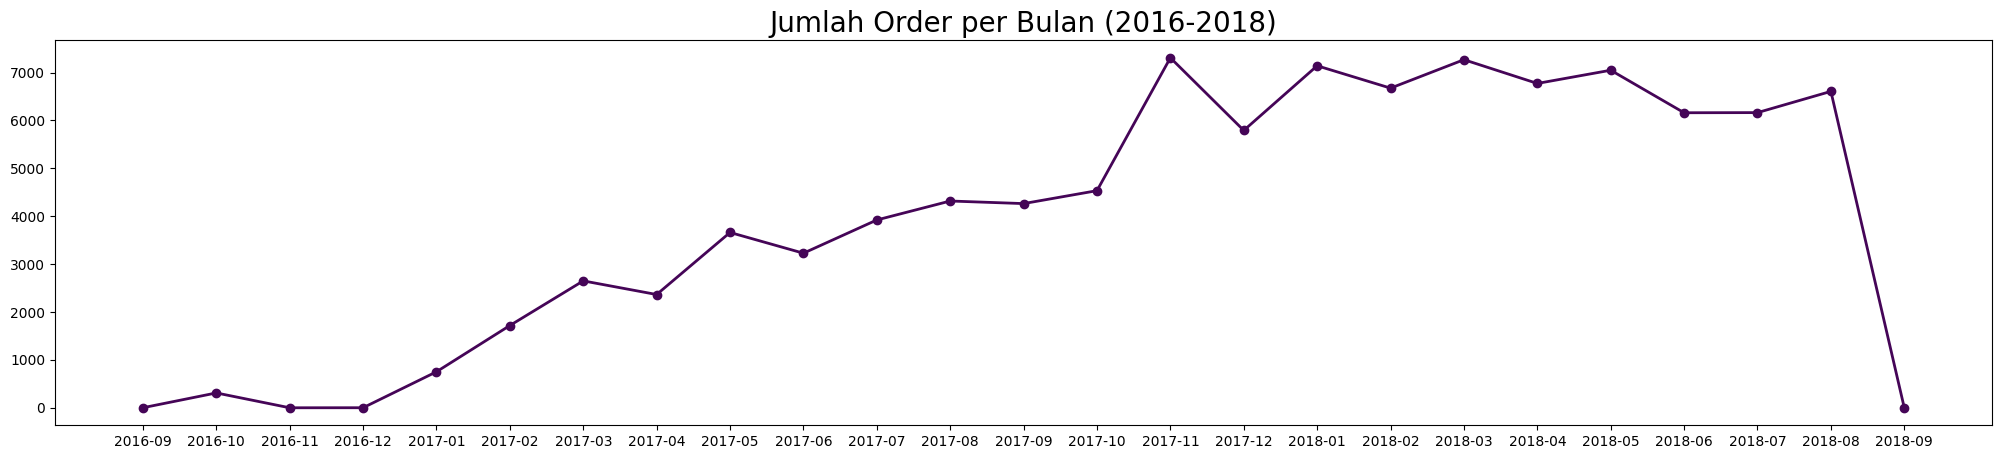

In [60]:
monthly_orders_df = all_df.resample(rule="M", on="order_approved_at").agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace="True")
monthly_orders_df.head()

plt.figure(figsize=(25,5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["order_count"], marker="o", linewidth=2, color="#450557")
plt.title("Jumlah Order per Bulan (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

>Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan September 2018. 

>Tentunya penurunan tersebut akan berdampak pada **total revenue** yang diperoleh perusahaan. Untuk memvalidasi hal ini, Saya membuat **LINE CHART**

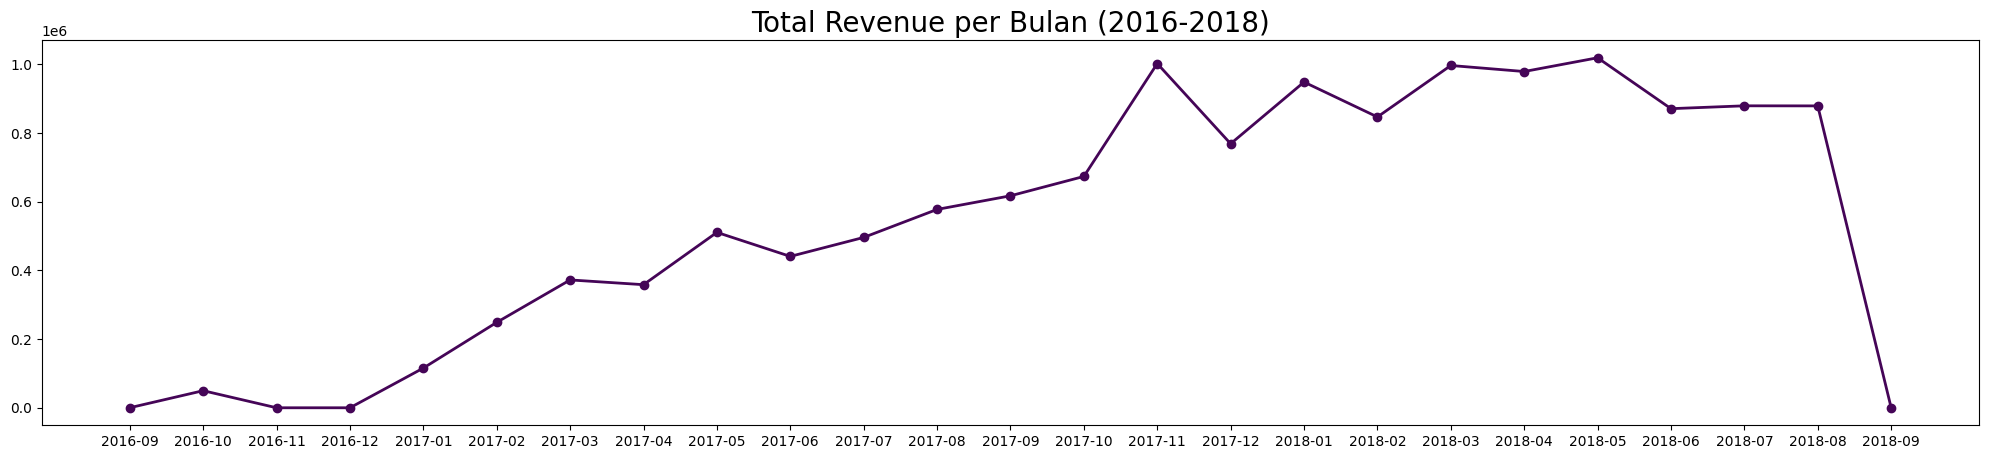

In [61]:
plt.figure(figsize=(25,5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["revenue"], marker="o", linewidth=2, color="#450557",)
plt.title("Total Revenue per Bulan (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### 2. Produk apa yang memiliki review score tertinggi?


>Pada pertanyaan bisnis selanjutnya, Saya mengidentifikasi produk dengan score_review terbanyak. Untuk melakukan ini, tentunya saya harus membuat sebuah DataFrame baru guna menampung informasi terkait jumlah score_review tiap produk dengan ketentuan memfilter data terlebih dahulu dimana data yang digunakan hanya data yang telah diberikan review. 

In [62]:
sum_review_score_filtered = all_df[all_df["review_id"] != "no_review"]
sum_review_score_df = sum_review_score_filtered.groupby(by="product_id").review_score.sum().sort_values(ascending=False).reset_index()
sum_review_score_df.head(5)

,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2106.0
1,422879e10f46682990de24d770e7f83d,1918.0
2,99a4788cb24856965c36a24e339b6058,1879.0
3,389d119b48cf3043d311335e499d9c6b,1610.0
4,368c6c730842d78016ad823897a372db,1522.0


>Saya membuat visualisasi data dalam bentuk **BAR CHART**. Selain itu, untuk mempermudah dalam mengidentifikasi produk dengan score_review terbaik.

c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


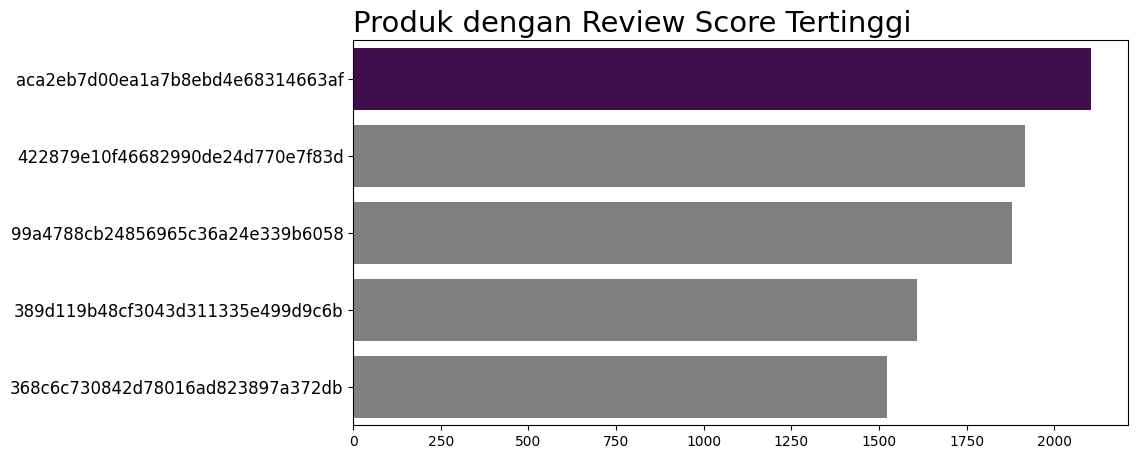

In [63]:
plt.figure(figsize=(10, 5))
colors=["#450557", "C7", "C7", "C7", "C7"]
sns.barplot(
    x="review_score",
    y="product_id",
    data=sum_review_score_df.head(5).sort_values(by="review_score", ascending=False),
    palette=colors
)
plt.title("Produk dengan Review Score Tertinggi", loc="left", fontsize=21)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

>Berdasarkan gambar di atas, produk dengan id aca2eb7d00ea1a7b8ebd4e68314663af merupakan produk yang memiliki review_score Tertinggi.

#### 3. Produk apa yang paling banyak terjual?

>Pada pertanyaan bisnis selanjutnya, Saya mengidentifikasi produk dengan penjualan terbanyak. Untuk melakukan ini, tentunya saya membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk. 

In [64]:
sum_order_items_df = all_df.groupby("product_id").order_item_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(5)

,product_id,order_item_id
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,491
2,422879e10f46682990de24d770e7f83d,487
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,391


>Saya membuat visualisasi data dalam bentuk **BAR CHART**. Selain itu, untuk mempermudah dalam mengidentifikasi produk dengan performa terbaik.

c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


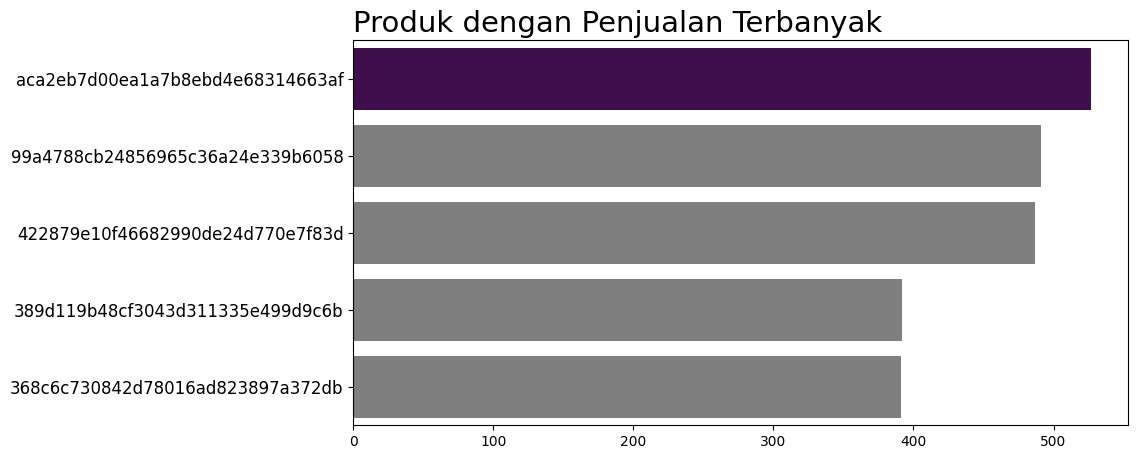

In [65]:
plt.figure(figsize=(10, 5))
colors=["#450557", "C7", "C7", "C7", "C7"]
sns.barplot(
    x="order_item_id",
    y="product_id",
    data=sum_order_items_df.head(5).sort_values(by="order_item_id", ascending=False),
    palette=colors
)
plt.title("Produk dengan Penjualan Terbanyak", loc="left", fontsize=21)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

>Berdasarkan gambar di atas, kita dapat melihat bahwa produk dengan id aca2eb7d00ea1a7b8ebd4e68314663af merupakan produk yang paling laris.

#### 4. Bagaimana demografi pelanggan berdasarkan negara yang kita miliki?

>Pertanyaan selanjutnya yang ingin dijawab ialah terkait demografi pelanggan yang dimiliki. Untuk menjawab hal ini, tentunya saya membuat DataFrame baru untuk menampung informasi terkait jumlah pelanggan untuk demografi negara.

In [66]:
all_df.groupby("customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41375
RJ    12762
MG    11544
RS     5432
PR     4998
SC     3612
BA     3358
DF     2125
ES     2025
GO     2007
PE     1648
CE     1327
PA      970
MT      903
MA      740
MS      709
PB      532
PI      493
RN      482
AL      411
SE      345
TO      279
RO      247
AM      147
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


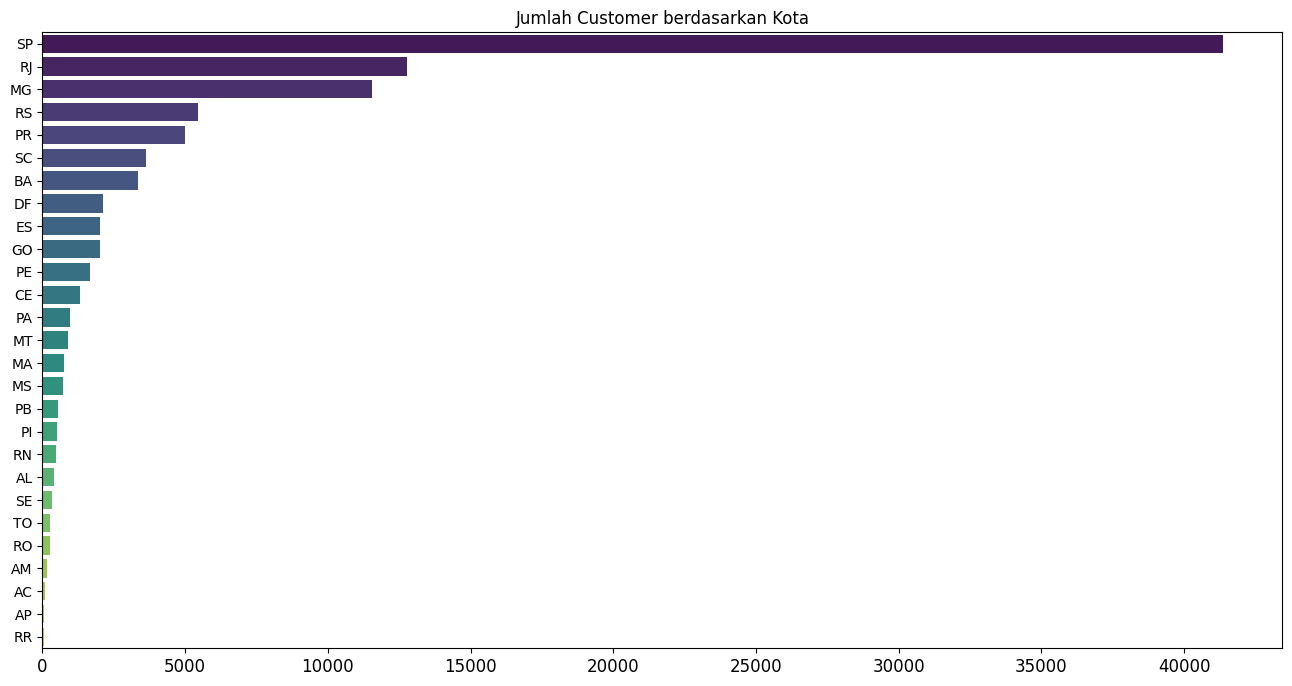

In [67]:
bycity_df = all_df.groupby("customer_state").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(16,8))
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette='viridis'
)

plt.title("Jumlah Customer berdasarkan Kota")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

>Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang dimiliki paling banyak berasal dari negara SP.

#### 5. Seller dengan review score reviews tertinggi?

>Pada pertanyaan bisnis selanjutnya, Sayamengidentifikasi Seller deangan review_score tertinggi. Untuk melakukan ini, tentunya saya harus membuat sebuah DataFrame baru guna menampung informasi terkait jumlah score_reviews tiap seller. 

In [68]:
sum_review_score_filtered = all_df[all_df["review_id"] != "no_review"]
sum_review_score_df = sum_review_score_filtered.groupby(by=["seller_state", "seller_id"]).review_score.sum().sort_values(ascending=False).reset_index()
sum_review_score_df.head()

,seller_state,seller_id,review_score
0,SP,6560211a19b47992c3666cc44a7e94c0,7897.0
1,SP,1f50f920176fa81dab994f9023523100,7694.0
2,SP,4a3ca9315b744ce9f8e9374361493884,7547.0
3,SP,cc419e0650a3c5ba77189a1882b7556a,7370.0
4,SP,da8622b14eb17ae2831f4ac5b9dab84a,6384.0


>Untuk mempermudah dalam menyampaikan informasi tersebut, Saya membuat visualisasi data dalam bentuk **BAR CHART**. Selain itu, untuk mempermudah dalam mengidentifikasi seller dengan score_review terbaik.

c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


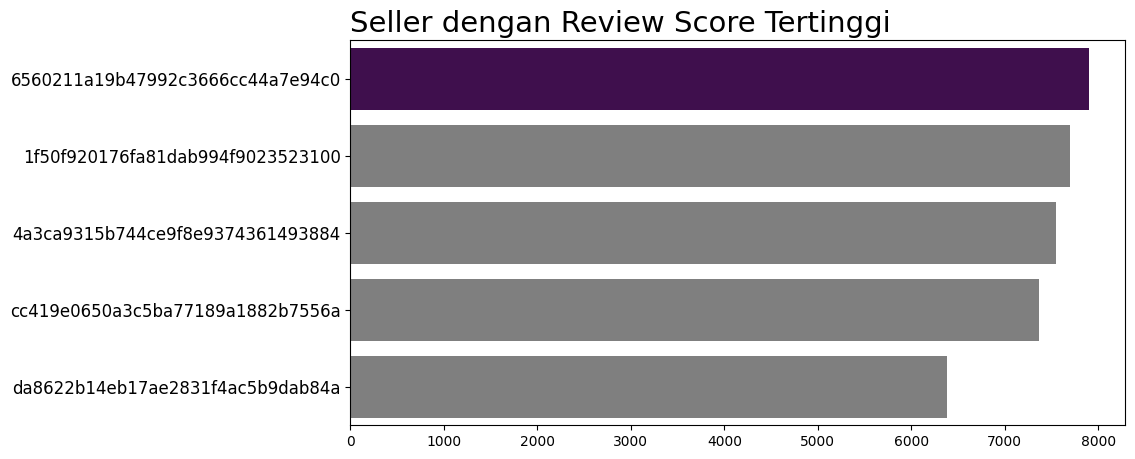

In [69]:
plt.figure(figsize=(10, 5))
colors=["#450557", "C7", "C7", "C7", "C7"]
sns.barplot(
    x="review_score",
    y="seller_id",
    data=sum_review_score_df.head(5).sort_values(by="review_score", ascending=False),
    palette=colors
)
plt.title("Seller dengan Review Score Tertinggi", loc="left", fontsize=21)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

>Berdasarkan gambar di atas, seller dengan id 6560211a19b47992c3666cc44a7e94c0 merupakan seller yang memiliki review_score Tertinggi.

#### 6. Kapan terakhir pelanggan melakukan transaksi?
#### 7. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
#### 8. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

#### RFM Analysis

>Untuk menjawab tiga pertanyaan analisis 6,7 dan 8, saya menggunakan teknik analisis lanjutan yang bernama RFM analysis. 
>Untuk melakukan RFM analysis, saya membuat sebuah DataFrame untuk menampung informasi terkait tiga parameter yaitu recency, frequency dan monetary.

> * Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
> * Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
> * Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [70]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382
4,000379cdec625522490c315e70c7a9fb,1,93.00,152


>Nah, pada tahap ini saya mengidentifikasi kostumer terbaik berdasarkan parameter frequency, monetary, dan recancy menggunakan kode berikut.

c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pcsekolah\.virtualenvs\submission-bWeK0KA4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

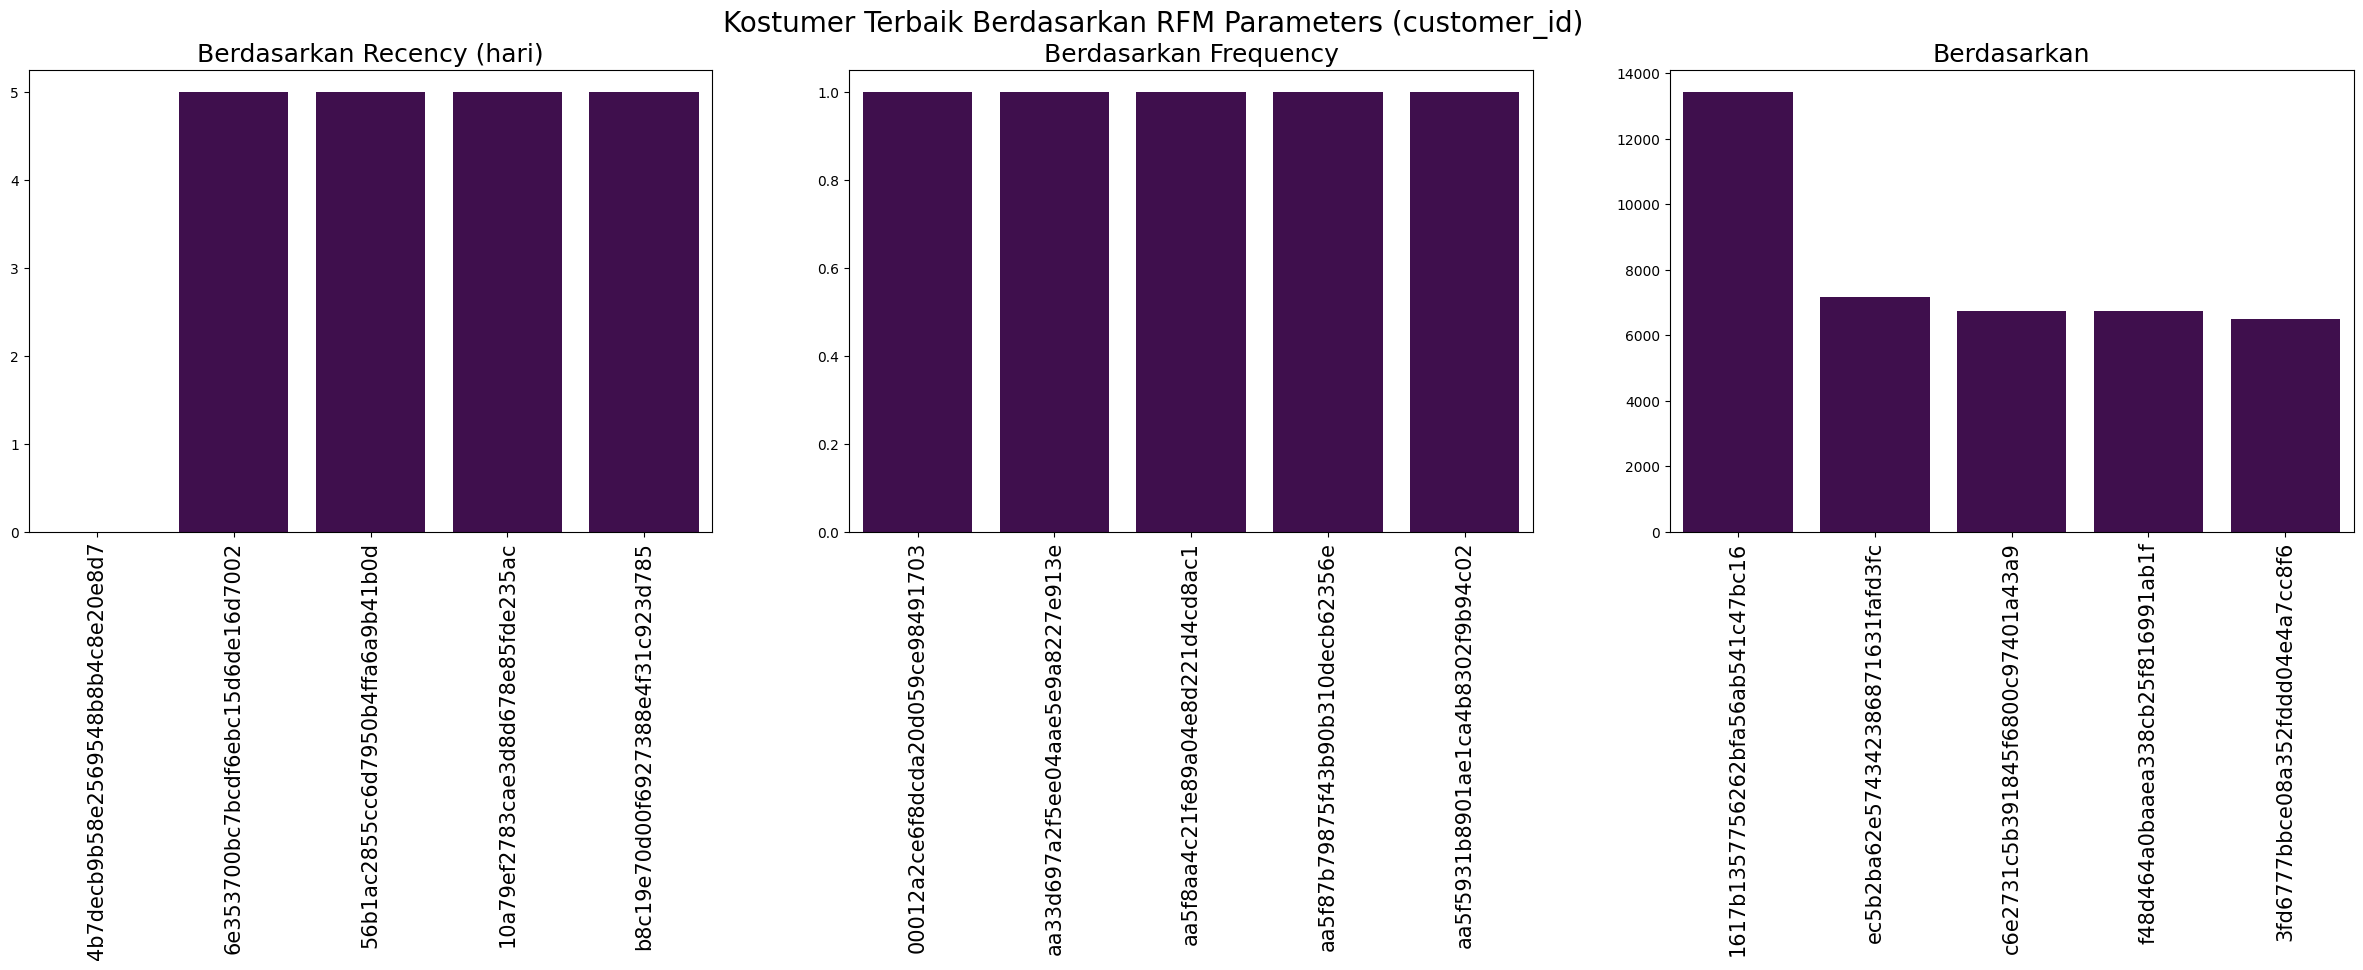

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors=["#450557", "#450557", "#450557", "#450557", "#450557"]
 
sns.barplot(x="customer_id", y="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
 
plt.suptitle("Kostumer Terbaik Berdasarkan RFM Parameters (customer_id)", fontsize=20)
plt.show()

>Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut. Informasi ini tentunya dapat membantu kita dalam menjawab tiga pertanyaan analisis terakhir.

### Conclusion

##### 1. Bagaimana performa dan revenue penjualan dalam beberapa bulan terakhir? 

> Dalam beberapa bulan terakhir jumlah orderan tertinggi terjadi pada bulan November Tahun 2017, namun terjadi penurunan pada beberapa bulan yakni:, November 2016, April 2017, Juni 2017, September 2017, December 2017, Februari 2018, April 2018, Juni  2018. Serta penuruan terendah terjadi pada bulan September 2019. dan terkait Revenue, revenue tertinggi terjadi pada bulan September 2017, dan penurunan terjadi searah dengan penurunan jumlah orderan terkecuali pada bulan September 2017 Revenue tetap meningkat.  

##### 2. Produk apa yang memiliki review score tertinggi?

>Produk dengan Skor Review Tertinggi adalah produk dengan Id aca2eb7d00ea1a7b8ebd4e68314663af.

##### 3. Produk apa yang paling banyak terjual?

> Produk dengan penjualan terbanyak adalah produk dengan Id aca2eb7d00ea1a7b8ebd4e68314663af.

##### 4. Bagaimana demografi pelanggan berdasarkan negara yang kita miliki?

> Berdasarkan negara, kita memiliki pelanggan terbesar berada pada negara SP, dan urutan kedua dan ketigita mencapai puluhan ribu pelanggan yaitu RJ dan MG. Serta pelanggan terkecil bearada pada negara RR dengan jumlah yang tidak mencapai ratusan.

##### 5. Seller dengan review score reviews tertinggi?

>Seller dengan Skor Review Tertinggi adalah seller dengan Id 6560211a19b47992c3666cc44a7e94c0 yang berada di negara SP.

##### 6. Kapan terakhir pelanggan melakukan transaksi?

> Berdasarkan Recency analysis, pelanggan yang melakukan transaksi terakhir adalah pelanggan dengan id 4b7decb9b58e2569548b8b4c8e20e8d7 Pada tanggal 2018-09-03. 

##### 7. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

> Berdasarkan Frequency analysis, setiap pelanggan hanya melakukan sekali trasaksi. 

##### 8. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

>Berdasarkan Monetary analysis, pelanggan yang paling banyak menghabiskan uang adalah pelanggan dengan id 1617b1357756262bfa56ab541c47bc16 senilai 13440.

###### Menyimpan Data

In [73]:
all_df.to_csv("main_data.csv", index=False)